In [121]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 

In [122]:
telstra_merge=pd.read_csv("telstra_merge")

In [123]:
telstra_merge.head() #reading in merged telstra dataset

,id,location,fault_severity,severity_type,resource_type,log_feature,volume,event_type
0,14121,location 118,1,severity_type 2,resource_type 2,feature 312,19,event_type 34
1,9320,location 91,0,severity_type 2,resource_type 2,feature 315,200,event_type 34
2,14394,location 152,1,severity_type 2,resource_type 2,feature 221,1,event_type 35
3,8218,location 931,1,severity_type 1,resource_type 8,feature 80,9,event_type 15
4,14804,location 120,0,severity_type 1,resource_type 2,feature 134,1,event_type 34


In [124]:
telstra_merge.shape

(7381, 8)

In [125]:
#DATA CLEANING

In [126]:
telstra_merge.isnull().sum()

id                0
location          0
fault_severity    0
severity_type     0
resource_type     0
log_feature       0
volume            0
event_type        0
dtype: int64

In [127]:
telstra_merge.isna().sum() #checking for missing values in the columns

id                0
location          0
fault_severity    0
severity_type     0
resource_type     0
log_feature       0
volume            0
event_type        0
dtype: int64

In [128]:
telstra_merge.isnull().values.any()

False

In [129]:
telstra_merge.dtypes

id                 int64
location          object
fault_severity     int64
severity_type     object
resource_type     object
log_feature       object
volume             int64
event_type        object
dtype: object

In [130]:

lb_make = LabelEncoder()

telstra_merge['location'] = lb_make.fit_transform(telstra_merge['location'])
telstra_merge['severity_type'] = lb_make.fit_transform(telstra_merge['severity_type'])
telstra_merge['resource_type'] = lb_make.fit_transform(telstra_merge['resource_type'])
telstra_merge['log_feature'] = lb_make.fit_transform(telstra_merge['log_feature'])
telstra_merge['event_type'] = lb_make.fit_transform(telstra_merge['event_type'])


In [131]:
telstra_merge.head(20)

,id,location,fault_severity,severity_type,resource_type,log_feature,volume,event_type
0,14121,131,1,1,2,143,19,22
1,9320,850,0,1,2,146,200,22
2,14394,163,1,1,2,88,1,23
3,8218,870,1,0,8,211,9,5
4,14804,134,0,0,2,21,1,22
5,1080,624,0,0,8,49,8,1
6,9731,602,0,3,2,170,3,37
7,15505,135,0,1,2,101,1,22
8,3443,265,1,1,2,143,1,22
9,13300,579,1,0,8,202,1,40


In [132]:
telstra_merge.dtypes

id                int64
location          int32
fault_severity    int64
severity_type     int32
resource_type     int32
log_feature       int32
volume            int64
event_type        int32
dtype: object

In [133]:
import seaborn as sns

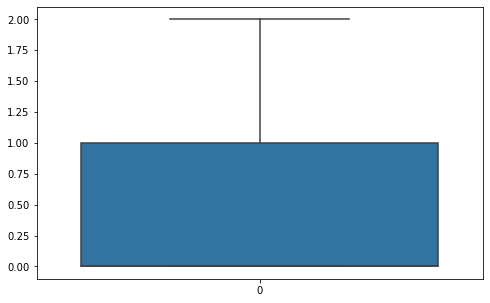

In [134]:
plt.figure(figsize=(8,5))
sns.boxplot(data=telstra_merge['fault_severity'])
plt.show()

In [135]:
telstra_merge.shape

(7381, 8)

In [136]:
telstra_merge.drop_duplicates(inplace = True)

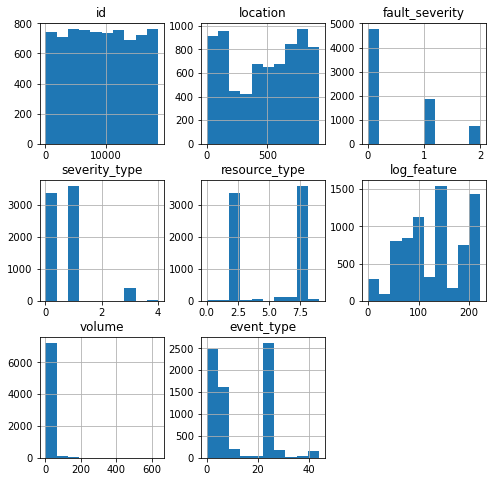

In [137]:
telstra_merge.hist(figsize=(8,8))
plt.show()

In [138]:
telstra_merge.describe()

,id,location,fault_severity,severity_type,resource_type,log_feature,volume,event_type
count,7381.000000,7381.000000,7381.00000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000
mean,9264.649099,474.316759,0.45021,0.657770,5.135077,130.233031,8.580409,11.937000
std,5349.290176,286.084285,0.66656,0.760966,2.963699,58.147892,23.539402,10.822876
min,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4647.000000,182.000000,0.00000,0.000000,2.000000,85.000000,1.000000,1.000000
50%,9222.000000,481.000000,0.00000,1.000000,7.000000,138.000000,2.000000,5.000000
75%,13885.000000,739.000000,1.00000,1.000000,8.000000,189.000000,7.000000,22.000000
max,18550.000000,928.000000,2.00000,4.000000,9.000000,222.000000,636.000000,44.000000


<AxesSubplot:>

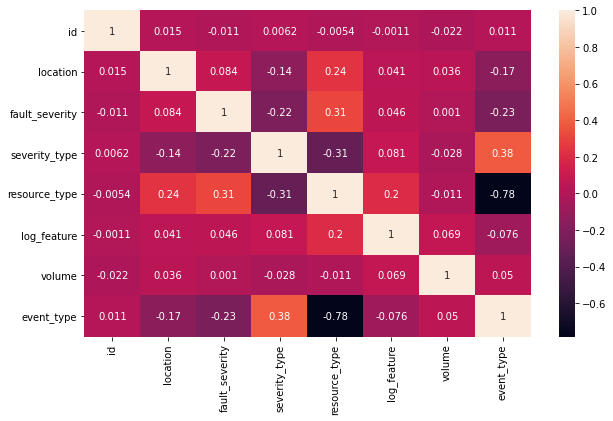

In [143]:
cor = telstra_merge.corr()
plt.figure(figsize =( 10,6))
sns.heatmap(cor, annot = True)

In [32]:
from sklearn.cluster import DBSCAN #checking for outliers

In [33]:

telstra_features=['location','severity_type','resource_type', 'log_feature', 'volume', 'event_type']
X= telstra_merge[telstra_features]



In [34]:
y = telstra_merge.fault_severity

In [35]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: fault_severity, dtype: int64

0    4784
1    1871
2     726
Name: fault_severity, dtype: int64

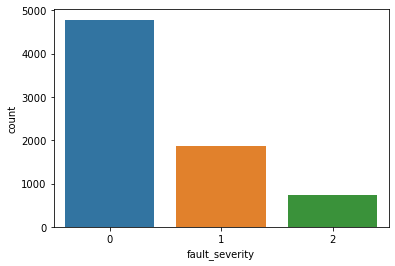

In [36]:
sns.countplot(x = 'fault_severity', data= telstra_merge)
telstra_merge['fault_severity'].value_counts() #checking for inbalanced variable and fixing it

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



In [39]:
X_train,X_val, y_train, y_val= train_test_split (X,y, test_size=0.25, random_state=1)

In [40]:
print("Training features/target:", X_train.shape, y_train.shape)
print("Testing features/target:", X_test.shape, y_test.shape)
print("Val features/target:", X_val.shape, y_val.shape)

Training features/target: (5535, 6) (5535,)
Testing features/target: (1477, 6) (1477,)
Val features/target: (1846, 6) (1846,)


count    5535.000000
mean        0.447877
std         0.666823
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: fault_severity, dtype: float64


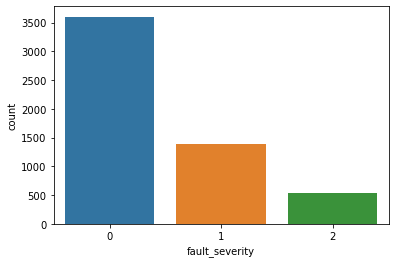

In [41]:
print(y_train.describe())
train_labels= y_train.to_frame()
sns.countplot(x='fault_severity',data=train_labels)
plt.show()


count    1846.000000
mean        0.457205
std         0.665902
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: fault_severity, dtype: float64


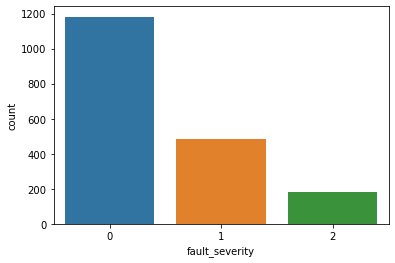

In [42]:
print(y_val.describe())
val_labels=y_val.to_frame()
sns.countplot(x='fault_severity',data=val_labels)
plt.show()

In [43]:
outlier_detection = DBSCAN(min_samples = 3, eps = 3)
clusters = outlier_detection.fit_predict(X_train)                       
totalOutliers=list(clusters).count(-1)
print(clusters)
print("total outlier is", totalOutliers)

[  0  -1   1 ...  -1  -1 279]
total outlier is 2341


In [44]:
mask = clusters != -1
X1_train, y1_train = X_train[mask], y_train[mask]


In [45]:
X1_train.shape 

(3194, 6)

In [46]:
y1_train.shape

(3194,)

In [47]:
ground_truth = clusters
print ("Ground truth: \n", ground_truth)

Ground truth: 
 [  0  -1   1 ...  -1  -1 279]


In [48]:
from sklearn.ensemble import IsolationForest

In [49]:
#Use the algorithm for outlier detection, then use it to predict each point
#Any point labelled as -1 is an outlier
clf = IsolationForest(max_samples=150, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(X_train)
print(preds)
totalOutliers=0
for pred in preds:
    if pred == -1:
        totalOutliers=totalOutliers+1
print("Total number of outliers identified is: ",totalOutliers)

#Calculate number of erroneos predictions where outlier predicction does not coindice with groundtruth
newarray= ((preds == -1) & (ground_truth==0))

n_errors= len([i for i in newarray if i==True])
print("Number of incorrectly identified outliers: ",n_errors)



[ 1  1  1 ... -1  1  1]
Total number of outliers identified is:  1413
Number of incorrectly identified outliers:  0


In [50]:
# select all rows that are not outliers and update the X_train and y_train.
mask = preds != -1
X2_train, y2_train = X_train[mask], y_train[mask] # Hence forth we will continue with X2_train, y2_train.

In [51]:
print(X2_train.shape, y2_train.shape) #IsolationForest predicted the outliers right.

(4122, 6) (4122,)


In [52]:
y2_train.value_counts()

0    2738
1    1041
2     343
Name: fault_severity, dtype: int64

count    4122.000000
mean        0.418971
std         0.640280
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: fault_severity, dtype: float64


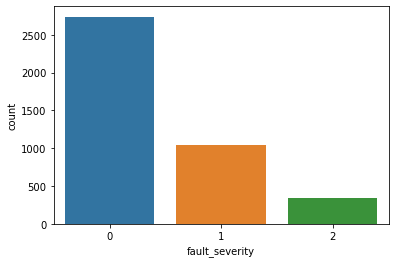

In [53]:
print(y2_train.describe())
train_labels=y2_train.to_frame()
sns.countplot(x='fault_severity',data=train_labels)
plt.show()

In [54]:
#Concatenate y2_train and X2_train to apply balancing, we would seperate them later again.
df = pd.concat([y2_train, X2_train], axis=1)

In [60]:
from sklearn.utils import resample #using Upsampling to balance the samples

In [61]:
df_majority = df[df.fault_severity == 0]
df_minority_1 = df[df.fault_severity == 1]
df_minority_2 = df[df.fault_severity == 2]

In [72]:
#upsample minorty class
df_minority_1_upsampled = resample(df_minority_1,
                                  replace = True,
                                  n_samples = 2738,
                                  random_state = 123)

In [73]:
df_minority_2_upsampled = resample(df_minority_2,
                                  replace = True,
                                  n_samples = 2738,
                                  random_state = 123)

In [74]:
df_upsampled = pd.concat([df_majority, df_minority_1_upsampled, df_minority_2_upsampled])


In [75]:
df_upsampled.fault_severity.value_counts()

2    2738
1    2738
0    2738
Name: fault_severity, dtype: int64

In [76]:
df_upsampled.describe()

,fault_severity,location,severity_type,resource_type,log_feature,volume,event_type
count,8214.000000,8214.000000,8214.000000,8214.000000,8214.000000,8214.000000,8214.000000
mean,1.000000,493.577064,0.505478,6.257244,135.658145,5.402849,8.093621
std,0.816546,292.649783,0.558002,2.711176,60.699302,6.646855,8.829837
min,0.000000,0.000000,0.000000,2.000000,6.000000,1.000000,0.000000
25%,0.000000,182.000000,0.000000,2.000000,74.000000,1.000000,1.000000
50%,1.000000,569.000000,0.000000,8.000000,143.000000,2.000000,5.000000
75%,2.000000,752.000000,1.000000,8.000000,202.000000,7.000000,22.000000
max,2.000000,928.000000,3.000000,9.000000,220.000000,52.000000,28.000000


<AxesSubplot:xlabel='fault_severity', ylabel='count'>

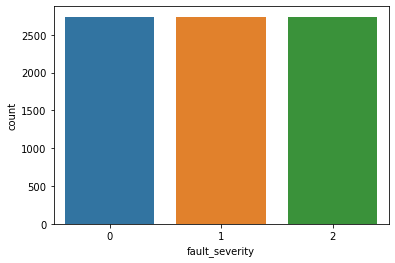

In [77]:
#Show distribution of the class on whole dataset

sns.countplot(x= 'fault_severity', data=df_upsampled)

In [78]:
df_upsampled.shape

(8214, 7)

In [79]:
df_upsampled.dtypes

fault_severity    int64
location          int32
severity_type     int32
resource_type     int32
log_feature       int32
volume            int64
event_type        int32
dtype: object

In [80]:
missing_values_count = df_upsampled.isnull().sum()
missing_values_count

fault_severity    0
location          0
severity_type     0
resource_type     0
log_feature       0
volume            0
event_type        0
dtype: int64

In [144]:
df_upsampled.to_csv('telstra_traindata.csv', index=False)

In [147]:
telstra_final = pd.read_csv('telstra_traindata.csv')

In [148]:
telstra_cor = telstra_final.corr()
print(telstra_cor)

,fault_severity,location,severity_type,resource_type,log_feature,volume,event_type
fault_severity,1.000000,0.138110,-0.273641,0.481302,0.074494,0.116094,-0.441844
location,0.138110,1.000000,-0.183357,0.335470,0.043614,0.107253,-0.341744
severity_type,-0.273641,-0.183357,1.000000,-0.478639,0.039908,0.046924,0.600511
resource_type,0.481302,0.335470,-0.478639,1.000000,0.169417,0.048416,-0.938869
log_feature,0.074494,0.043614,0.039908,0.169417,1.000000,0.164109,-0.125917
volume,0.116094,0.107253,0.046924,0.048416,0.164109,1.000000,0.002629
event_type,-0.441844,-0.341744,0.600511,-0.938869,-0.125917,0.002629,1.000000


<AxesSubplot:>

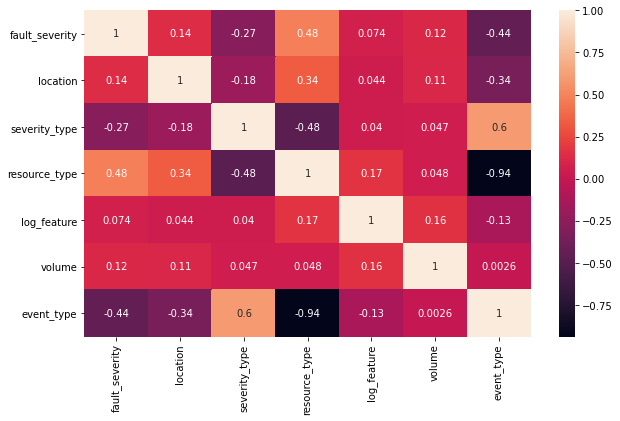

In [146]:
#checking for correlation coefficient for feature selection
cor = telstra_final.corr()
plt.figure(figsize =( 10,6))
sns.heatmap(cor, annot = True)

In [83]:
features=['location','severity_type','resource_type', 'log_feature', 'volume', 'event_type']
X= telstra_final[features]
X.head(10)

,location,severity_type,resource_type,log_feature,volume,event_type
0,254,0,2,88,1,23
1,463,1,2,95,2,22
2,62,0,8,203,3,1
3,669,0,8,54,2,6
4,451,1,2,143,4,23
5,174,1,8,56,1,1
6,226,0,2,88,1,8
7,773,0,8,199,1,1
8,456,0,2,85,4,8
9,483,1,2,99,2,23


In [155]:
y=telstra_final.fault_severity
y.head()

0    0
1    0
2    0
3    0
4    0
Name: fault_severity, dtype: int64

In [85]:
# Model evaluation Without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [86]:
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [87]:
X_train.shape

(4928, 6)

In [88]:
X_val.shape

(1643, 6)

In [89]:
X_test.shape

(1643, 6)

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [91]:
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [92]:
y_pred = model.predict(X_val)

In [93]:
y_pred

array([2, 0, 2, ..., 1, 2, 0], dtype=int64)

In [94]:
print("Test_score : ", accuracy_score(y_val, y_pred)) # compare accuracy of the actual with the predicted

Test_score :  0.5739500912964091


In [95]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_val, y_pred))

Confusion Matrix
[[298 115 130]
 [175 220 150]
 [  5 125 425]]


In [97]:
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(y_val, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.62      0.55      0.58       543
           1       0.48      0.40      0.44       545
           2       0.60      0.77      0.67       555

    accuracy                           0.57      1643
   macro avg       0.57      0.57      0.57      1643
weighted avg       0.57      0.57      0.57      1643



In [98]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

In [99]:
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    return models

In [100]:
# evaluate a given model using cross-validation
#The evaluate_model() function below takes a model instance and returns a list of scores from three repeats of stratified 10-fold cross-validation.

def evaluate_model(model,X_train, y_train):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>lr 0.527 (0.020)
>knn 0.746 (0.018)
>cart 0.858 (0.018)
>svm 0.478 (0.020)
>bayes 0.518 (0.019)


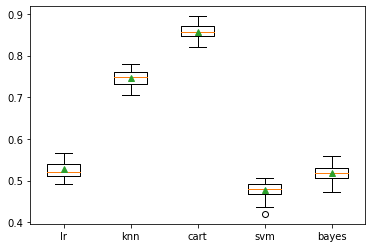

In [101]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [103]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [104]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models

>lr 0.527 (0.020)
>knn 0.746 (0.018)
>cart 0.859 (0.016)
>svm 0.478 (0.020)
>bayes 0.518 (0.019)
>stacking 0.862 (0.015)


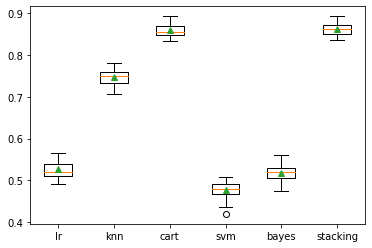

In [105]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [107]:
# define the base models
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))

In [110]:
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

In [111]:
# define the base models
level0 = list()
level0.append(('cart', DecisionTreeClassifier()))

In [112]:
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
model = DecisionTreeClassifier().fit(X_train, y_train)

In [114]:
location= 438
severity_type = 1
resource_type = 2
log_feature = 98
volume = 3
event_type = 22

prediction = model.predict([[ location, severity_type, resource_type, log_feature, volume, event_type]])

print(prediction)
if (prediction[0]==0):
    print("No fault")
    
elif (prediction==[1]):
    
    print("Minor fault")

else: 
    print("Major fault")

    


[1]
Minor fault


In [115]:
import pickle 

In [117]:
# save the model to disk
filename = 'telstrafinalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [119]:
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.979099025974026
